<h1>Lending Club Data Analysis</h1>

<h2>1. Introduction</h2>

<li>For this project, we wish to present and explore the data provided by Lending Club. 
<li><b style="color:blue">Lending Club</b> is a peer-to-peer online lending platform. It is the world’s largest marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Each <b style="color:blue">borrower</b> fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower’s credit score using past historical data (and their own data science process!) and assigns an interest rate to the borrower.
<li>The loan is then listed on the Lending Club marketplace.

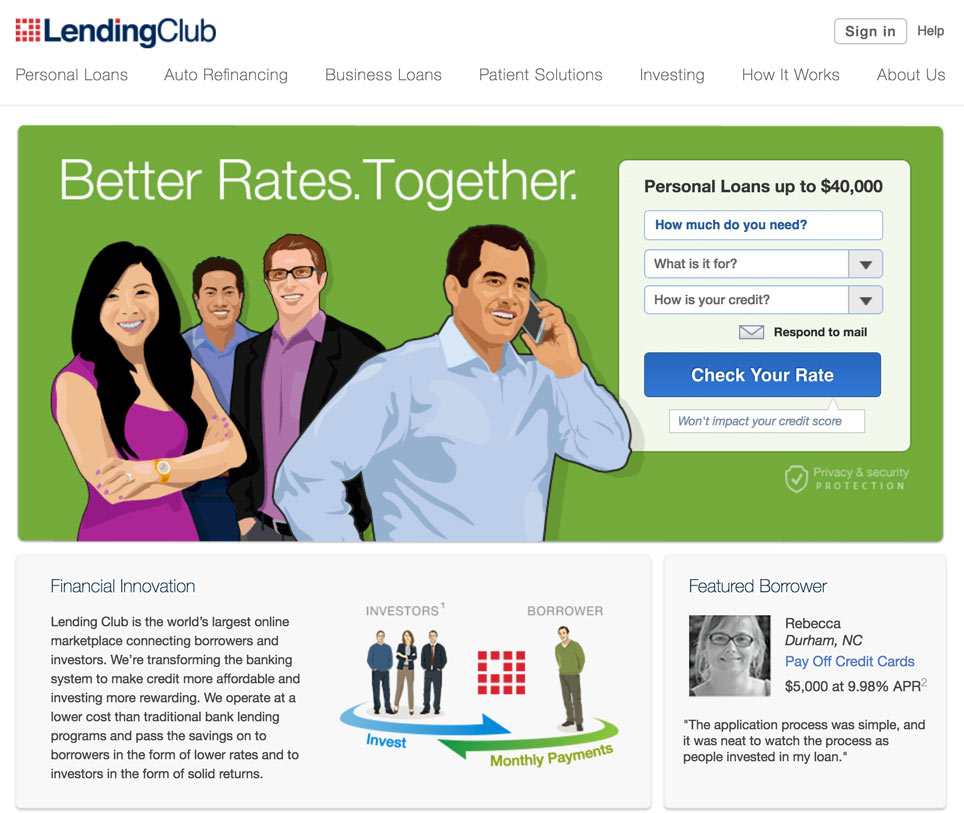

In [1]:
from IPython.display import Image
Image(filename = "LC1.jpg", width=900, height=900)

<li><b style="color:blue">Investors</b> are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower’s credit score, the purpose for the loan, and other information from the application.
<li>Once an investor decides to fund a loan, the borrower then makes monthly payments back to Lending Club. Lending Club redistributes these payments to the investors. This means that investors don’t have to wait until the full amount is paid off to start to see money back. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren’t completely paid off on time, however, and some borrowers <b style="color:blue">default</b> on the loan.

<h3>How does an online credit marketplace work?</h3>
<li>Lending Club uses technology to operate a credit marketplace at a lower cost than traditional bank loan programs, passing the savings on to borrowers in the form of lower rates and to investors in the form of solid returns. Borrowers who used a personal loan via Lending Club to consolidate debt or pay off high interest credit cards report in a survey that the interest rate on their loan was an average of 24% lower than they were paying on their outstanding debt or credit cards.
<li>By providing borrowers with better rates, and investors with attractive, risk-adjusted returns, Lending Club has earned among the highest satisfaction ratings in the financial services industry.

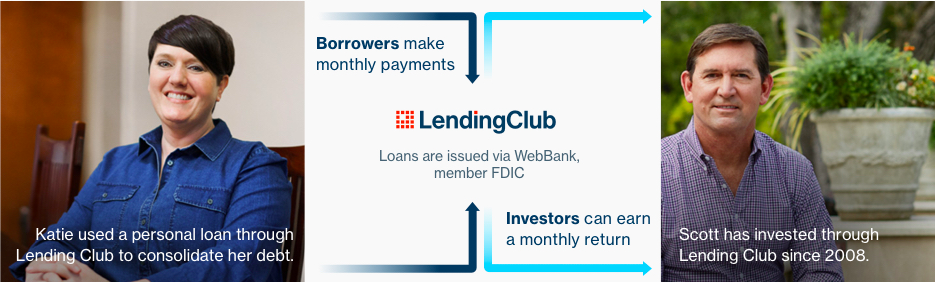

In [2]:
from IPython.display import Image
Image(filename = "LC2.png", width=1000, height=500)

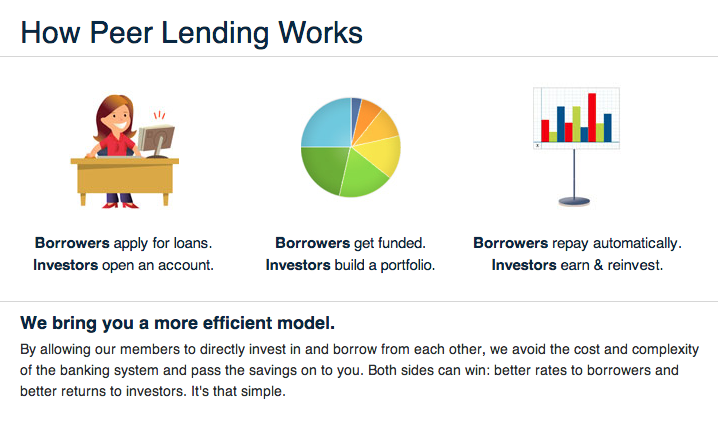

In [3]:
from IPython.display import Image
Image(filename = "LC3.png", width=800, height=800)

<h2>2. Exploring the dataset!</h2>

<h3>Data</h3>
https://www.lendingclub.com/info/download-data.action
<li>The original data set is an aggregate of issued loans from Lending Club through 2007-2015. It contains <b style="color:blue">890</b> thousand observations and <b style="color:blue">75</b> variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',None)
sns.set(style="white", color_codes=True)
%matplotlib inline

df = pd.read_csv('loan.csv') 
df.head()

C:\Users\wangj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(887379, 74)

<h3>Loan Information</h3>

<h4>Loan Amount</h4>

C:\Users\wangj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\wangj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


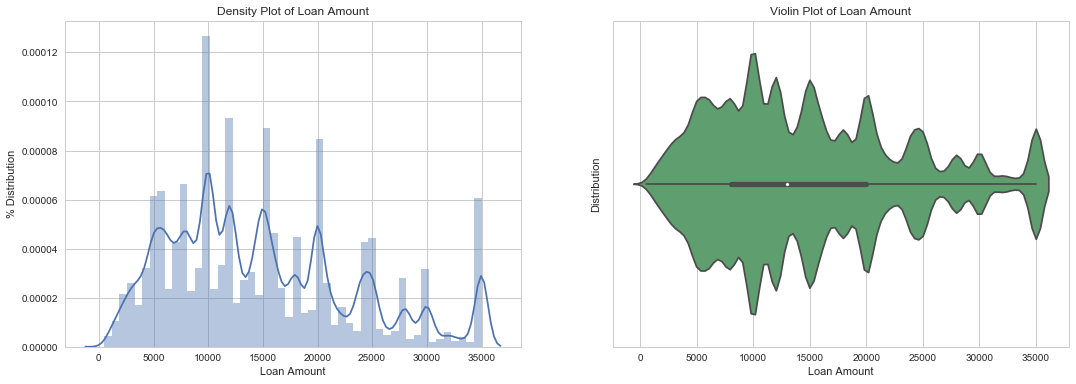

In [4]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df.loan_amnt, ax=axs[0])
axs[0].set(xlabel='Loan Amount', 
       ylabel='% Distribution',title='Density Plot of Loan Amount')
sns.violinplot(df.loan_amnt,color="g", ax=axs[1])
axs[1].set(xlabel='Loan Amount', 
       ylabel='Distribution',title='Violin Plot of Loan Amount')
plt.legend()
plt.show()

In [5]:
df['loan_amnt'].describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

<h4>Loan Status</h4>

In [6]:
loan_status_distribution=pd.DataFrame(df['loan_status'].value_counts())
loan_status_distribution.reset_index(inplace=True)
loan_status_distribution.columns=['Loan_Status_Category','Number of applicants']
loan_status_distribution

,Loan_Status_Category,Number of applicants
0,Current,601779
1,Fully Paid,207723
2,Charged Off,45248
3,Late (31-120 days),11591
4,Issued,8460
5,In Grace Period,6253
6,Late (16-30 days),2357
7,Does not meet the credit policy. Status:Fully ...,1988
8,Default,1219
9,Does not meet the credit policy. Status:Charge...,761


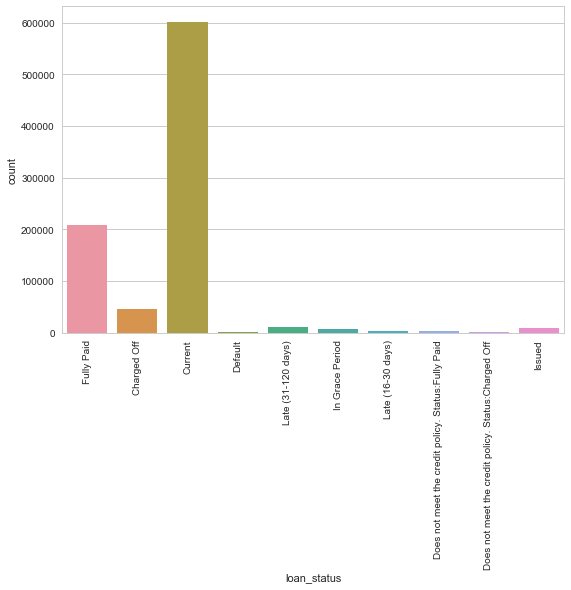

In [7]:
plt.rcParams['figure.figsize'] = (9,6)
sns.countplot(df['loan_status'])
plt.xticks(rotation=90)
plt.show()

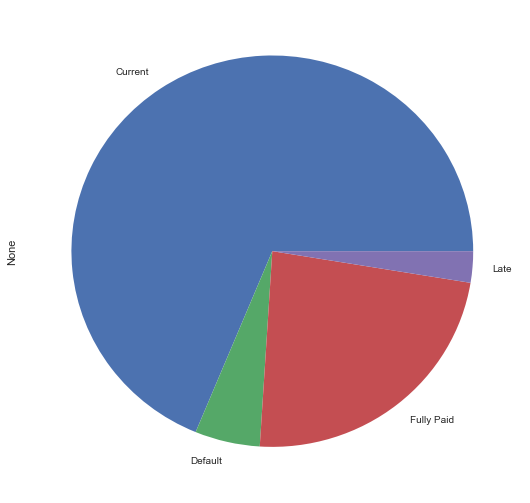

In [8]:
plt.rcParams['figure.figsize'] = (9,9)
def status_class(text):
    if text=='Fully Paid':
        return 'Fully Paid'
    elif text=='Charged Off' or text=='Default':
        return 'Default'
    elif text=='Current' or text=='Issued':
        return 'Current'
    else:
        return 'Late'
    
df['status_class']=df['loan_status'].apply(status_class)
df.groupby('status_class').size().plot(kind='pie')

<h4>Purpose</h4>

In [9]:
df["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

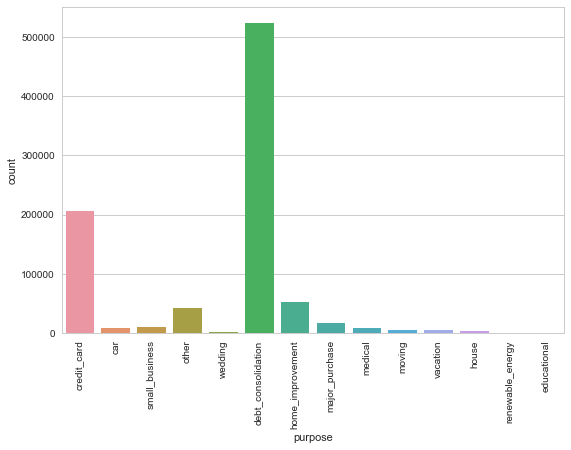

In [10]:
plt.rcParams['figure.figsize'] = (9,6)
sns.countplot(df['purpose'])
plt.xticks(rotation=90)
plt.show()

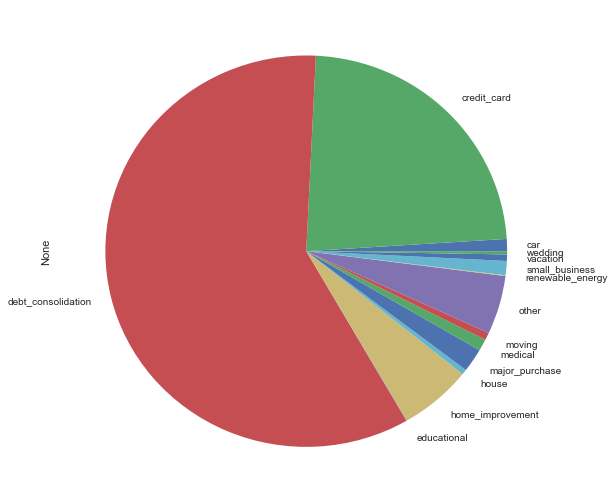

In [11]:
plt.rcParams['figure.figsize'] = (9,9)
df.groupby('purpose').size().plot(kind='pie')

<h4>Word Cloud of Title</h4>

In [12]:
import nltk
import collections as co
l = []
df['title'].apply(lambda x: l.append(x))
s=str(l)

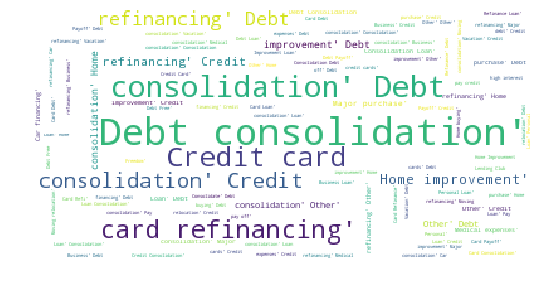

In [13]:
plt.rcParams['figure.figsize'] = (9,6)
from wordcloud import WordCloud, STOPWORDS

text = s

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=100).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h4>Term</h4>

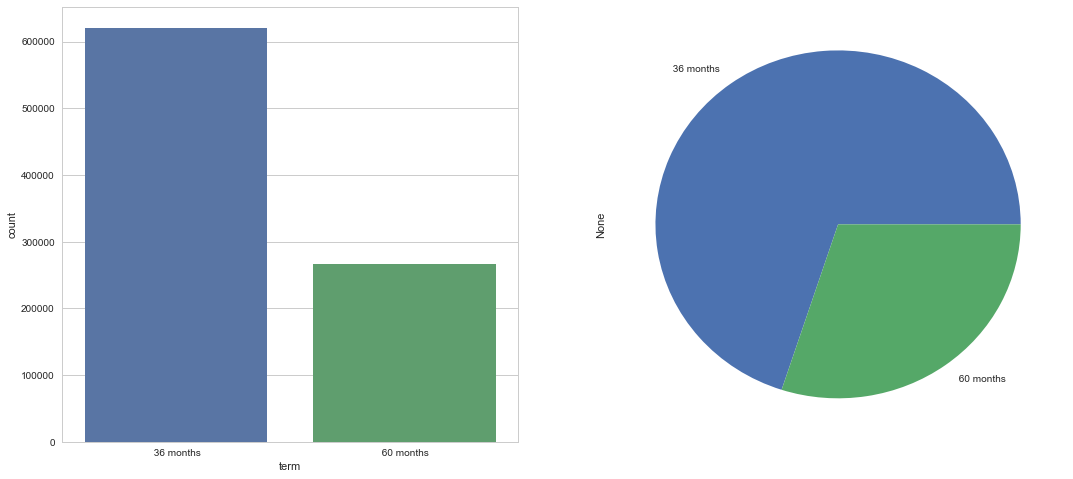

In [14]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
sns.countplot(df['term'],ax=axs[0])
df.groupby('term').size().plot(kind='pie', ax=axs[1])
plt.show()

<h4>Application Type</h4>

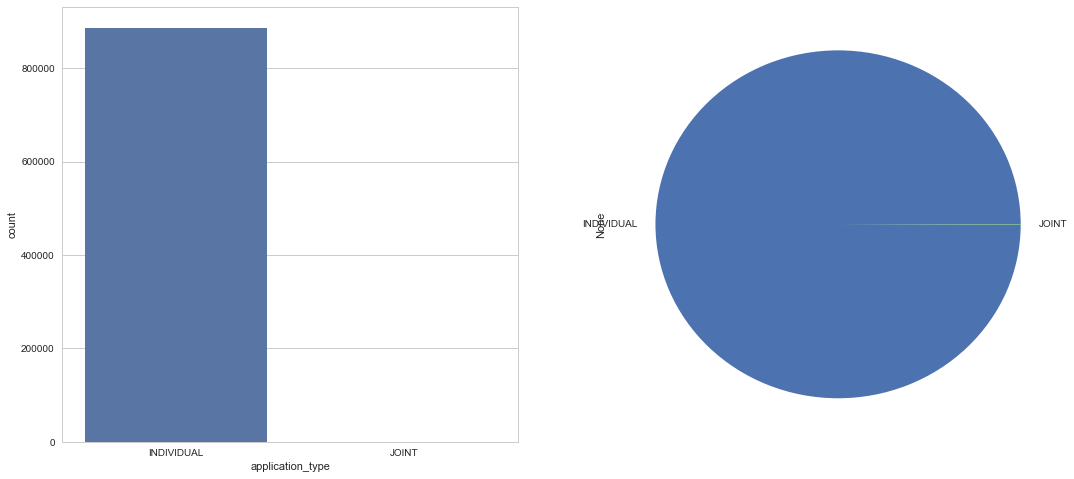

In [15]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
sns.countplot(df['application_type'],ax=axs[0])
df.groupby('application_type').size().plot(kind='pie',ax=axs[1])
plt.show()

<h3>Borrower Information</h3>

<h4>Employment Length</h4>

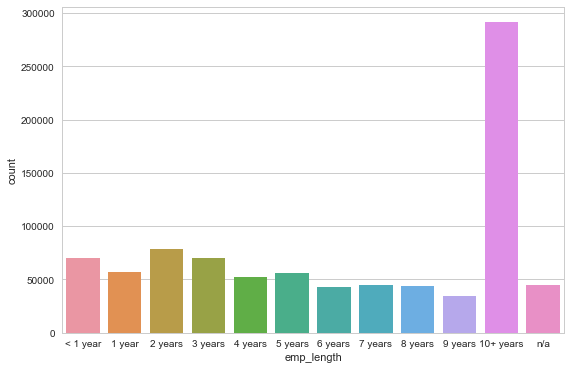

In [16]:
plt.rcParams['figure.figsize'] = (9,6)
sns.countplot(df['emp_length'], order = ('< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
                                         '7 years', '8 years', '9 years', '10+ years', 'n/a'))

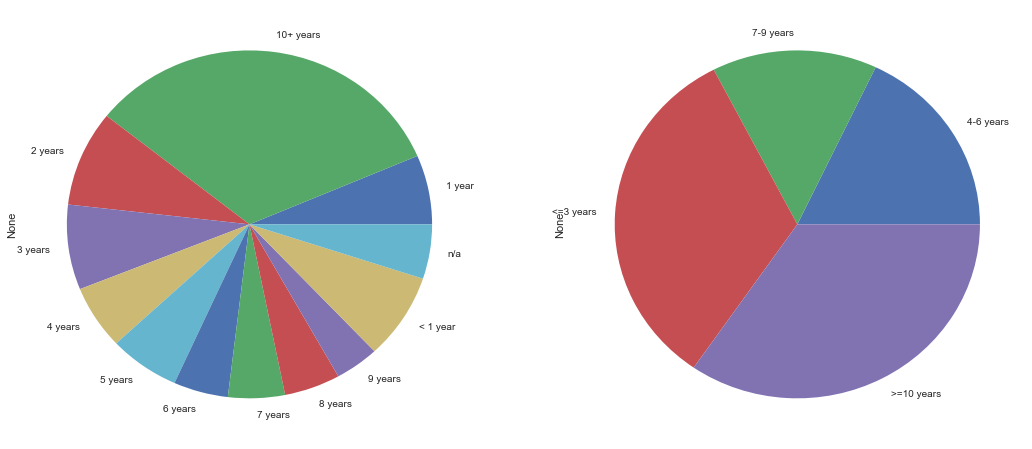

In [17]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
df.groupby('emp_length').size().plot(kind='pie',ax=axs[0])

def emp_length_class(text):
    if text=='< 1 year' or text=='1 year' or text=='2 years' or text=='3 years':
        return '<=3 years'
    elif text=='4 years' or text=='5 years' or text=='6 years':
        return '4-6 years'
    elif text=='7 years' or text=='8 years' or text=='9 years':
        return '7-9 years'
    elif text=='10+ years':
        return '>=10 years'
    else:
        return None
df['emp_length_class']=df['emp_length'].apply(emp_length_class)
df.groupby('emp_length_class').size().plot(kind='pie',ax=axs[1])

plt.show()

<h4>Annual Income</h4>

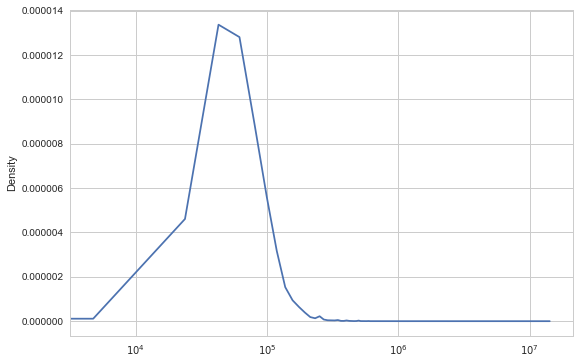

In [18]:
plt.rcParams['figure.figsize'] = (9,6)
df["annual_inc"].plot.density(logx = True)

In [19]:
df["annual_inc"].describe()

count    8.873750e+05
mean     7.502759e+04
std      6.469830e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

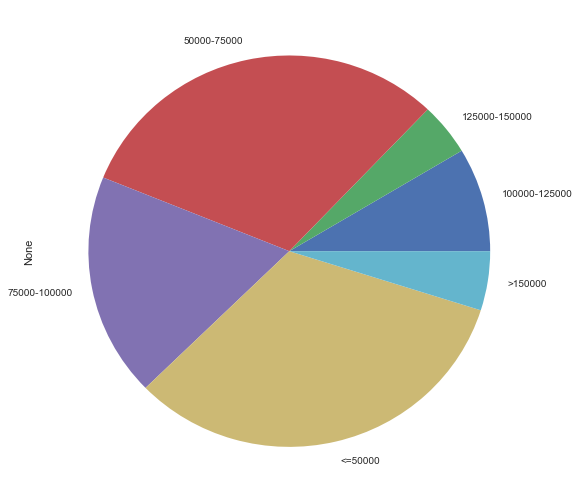

In [20]:
plt.rcParams['figure.figsize'] = (9,9)
def inc_class(num):
    if num <= 50000:
        return '<=50000'
    elif num <= 75000:
        return '50000-75000'
    elif num <= 100000:
        return '75000-100000'
    elif num <= 125000:
        return '100000-125000'
    elif num <= 150000:
        return '125000-150000'
    else:
        return '>150000'

df['inc_class']=df['annual_inc'].apply(inc_class)
df.groupby('inc_class').size().plot(kind='pie')

<h3>Interest Rate</h3>

C:\Users\wangj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\wangj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


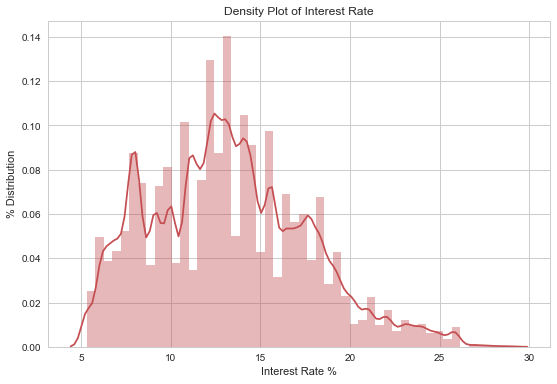

In [21]:
plt.rcParams['figure.figsize'] = (9,6)
ax=sns.distplot(df.int_rate, color="r")
ax.set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate')

plt.legend();

In [22]:
df['int_rate'].describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

<h4>Interest Rate by Term / Employment Length / Application Type / Purpose</h4>

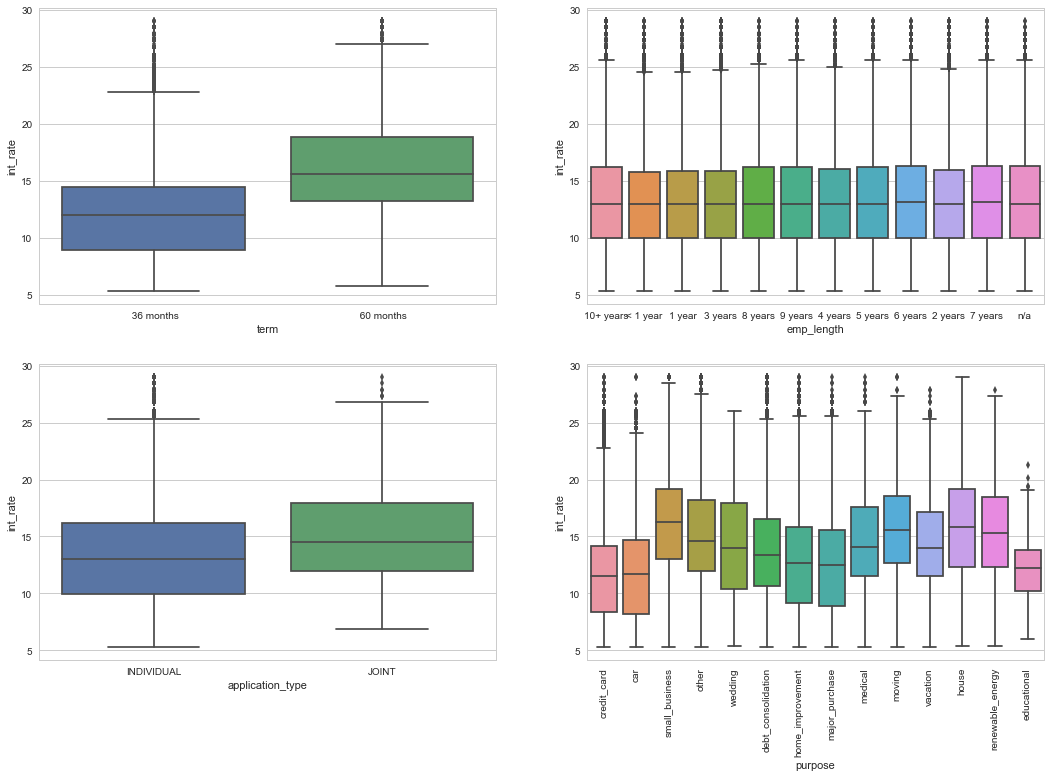

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))

sns.boxplot(x='term', y='int_rate', data=df, ax=axes[0, 0])
sns.boxplot(x='emp_length', y='int_rate', data=df, ax=axes[0, 1])
plt.xticks(rotation=50)
sns.boxplot(x='application_type', y='int_rate', data=df, ax=axes[1, 0])
plt.xticks(rotation=90)
sns.boxplot(x='purpose', y='int_rate', data=df, ax=axes[1, 1])
plt.xticks(rotation=90)

plt.show()

<h3>Credit Grade</h3>

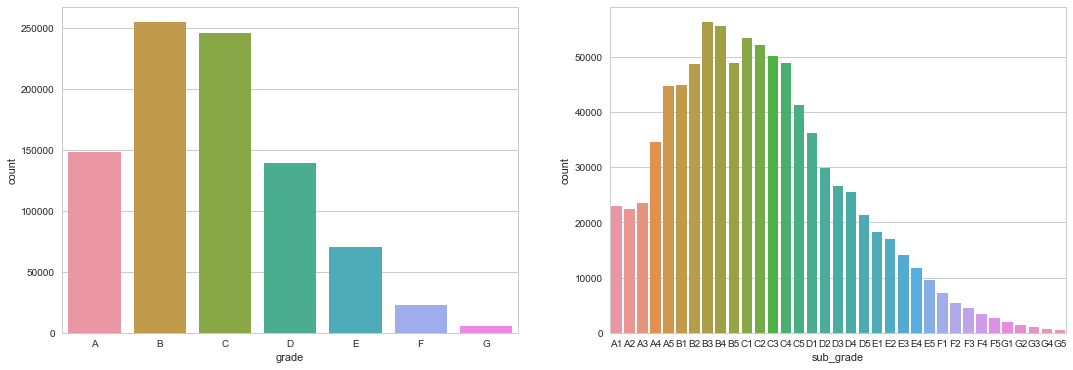

In [24]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.countplot(df['grade'], order = ('A','B','C','D','E','F','G'), ax=axs[0])

l = []
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for j in ['1', '2', '3', '4', '5']:
        l.append(i+j)     
sns.countplot(df['sub_grade'], order = l, ax=axs[1])

plt.show()

<h4>Interest Rate by Grade</h4>

In [25]:
df.groupby("grade")["int_rate"].mean()

grade
A     7.243312
B    10.829618
C    13.980098
D    17.175814
E    19.897322
F    23.582787
G    25.626706
Name: int_rate, dtype: float64

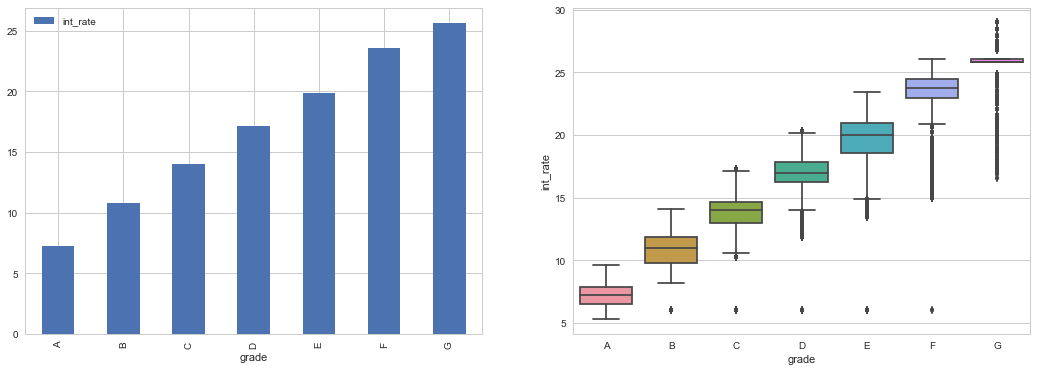

In [26]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
df[['grade','int_rate']].groupby('grade').mean().plot(kind='bar', ax=axs[0])
sns.boxplot(x='grade', y='int_rate', data=df, order = 'ABCDEFG', ax=axs[1])
plt.show()

<h4>Loan Amount by Grade</h4>

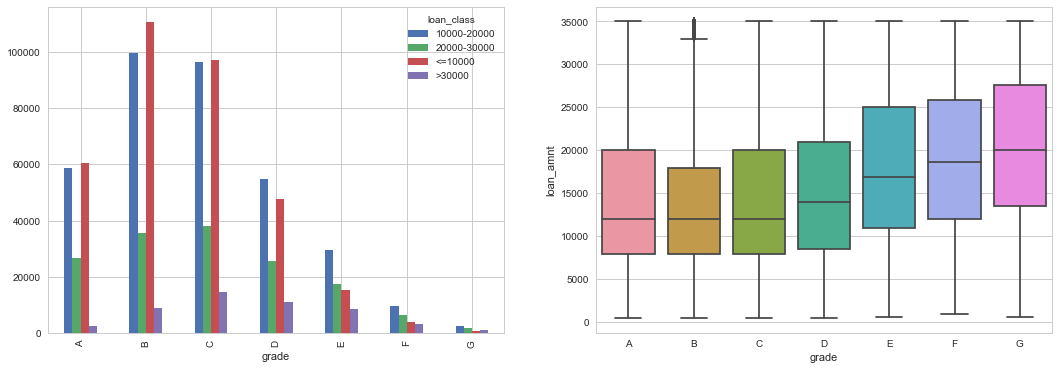

In [27]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

def loan_class(num):
    if num <= 10000:
        return '<=10000'
    elif num <= 20000:
        return '10000-20000'
    elif num <= 30000:
        return '20000-30000'
    else:
        return '>30000'
df['loan_class']=df['loan_amnt'].apply(loan_class)
df.groupby(['grade','loan_class']).size().unstack().plot(kind='bar', ax=axs[0])
sns.boxplot(x='grade', y='loan_amnt', data=df, order = 'ABCDEFG', ax=axs[1])
plt.show()

<h4>Term by Grade</h4>

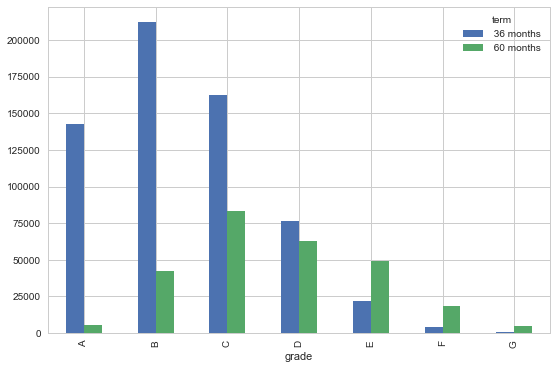

In [28]:
df.groupby(['grade','term']).size().unstack().plot(kind='bar')

<h3>Default Situation</h3>

<h4>Default by Grade</h4>

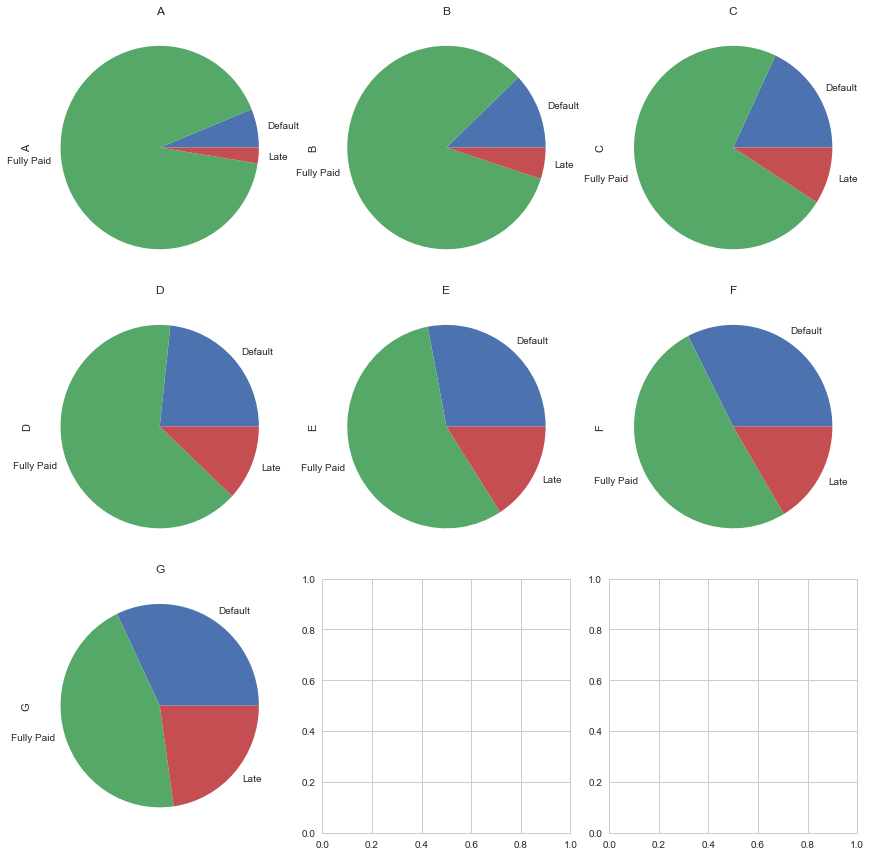

In [29]:
grade_status = df[df['status_class']!='Current'].groupby(['status_class','grade']).size().unstack()
COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (grade, status_count) in enumerate(grade_status.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    status_count.plot(kind='pie', ax=ax)
    ax.set_title(grade)

plt.tight_layout()

<h4>Default Rate by Purpose</h4>

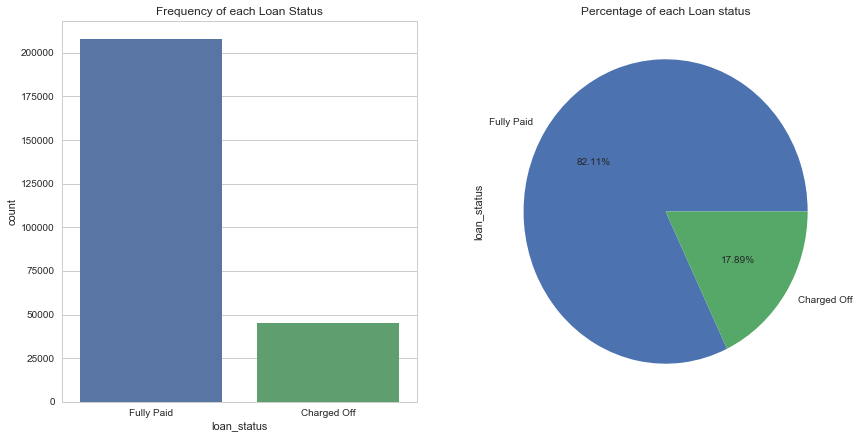

In [30]:
#Among 10 kinds of purposes, we only cares about 'Fully paid' and 'Chareged off'
df_sub = df[(df["loan_status"] == "Fully Paid") |(df["loan_status"] == "Charged Off")]
filtered_loans = df_sub
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
filtered_loans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [31]:
#Assign dummy variable to loan status
mapping_dictionary = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1}}
filtered_loans = filtered_loans.replace(mapping_dictionary)

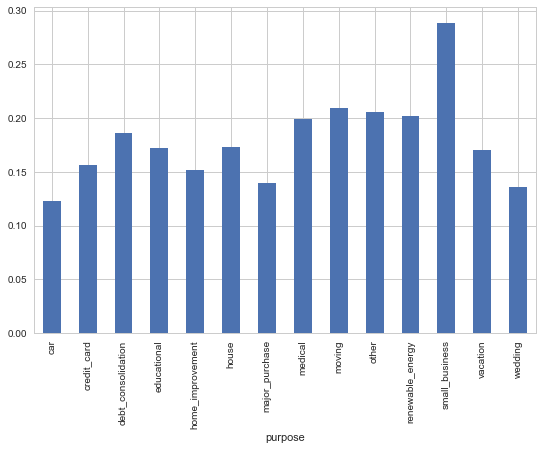

,sum,len,mean
purpose,,,
car,448,3646,0.122874
credit_card,7826,50076,0.156282
debt_consolidation,27599,148363,0.186023
educational,56,325,0.172308
home_improvement,2269,14929,0.151986
house,286,1652,0.173123
major_purchase,874,6265,0.139505
medical,569,2854,0.199369
moving,425,2028,0.209566


In [32]:
plt.rcParams['figure.figsize'] = (9,6)
purpose_=pd.pivot_table(filtered_loans, index = 'purpose',values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(purpose_['mean'].plot(kind = 'bar')) 
purpose_

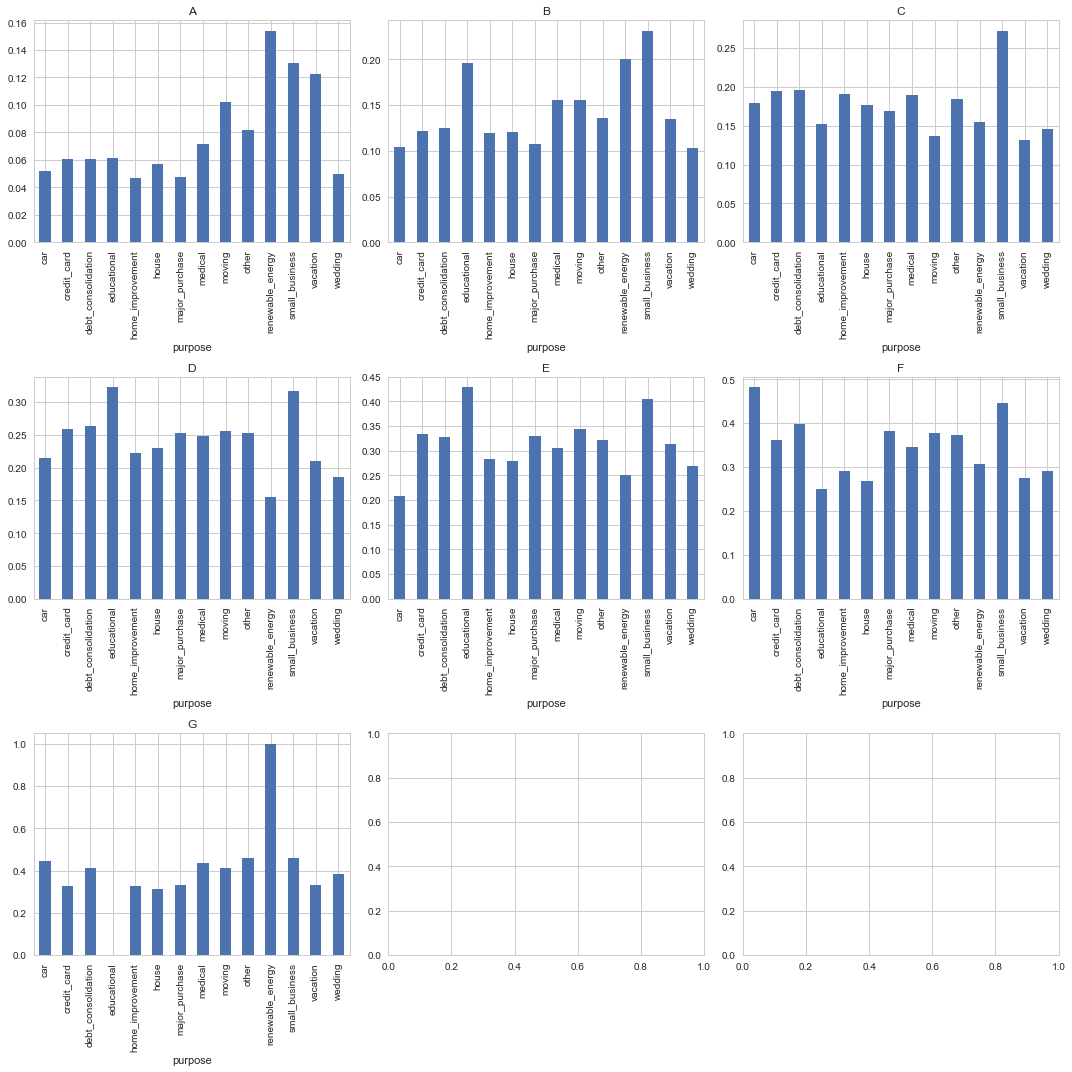

In [33]:
COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

for i,g in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    p = pd.pivot_table(filtered_loans[filtered_loans['grade'] == g], index = 'purpose', values = 'loan_status', aggfunc=[np.sum,len,np.mean])['mean']
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    p.plot(kind='bar', ax=ax)
    ax.set_title(g)

plt.tight_layout()

<h4>Default by State</h4>

In [34]:
import itertools
from sklearn import preprocessing
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [35]:
State_List = []
for x in df['addr_state']:
    if x not in State_List:
        State_List.append(x)

Loan_Amount = []
Average_Balance = []
Default_Rate = []
Weighted_Rate = []
Average_Income = []
Average_Employment_Length = []
Average_DTI = []
Average_Inq_12 = []
Average_Inq_6 = []

for x in State_List:
    new_df = df[df['addr_state'] == x]
    
    Loan_Sum = sum(new_df['funded_amnt'])
    Loan_Amount.append(Loan_Sum)
    
    Average_Balance.append(Loan_Sum/len(new_df['funded_amnt']))
    
    Defaults = []
    for value in new_df.loan_status:
        if value == 'Default':
            Defaults.append(1)
        if value == 'Charged Off':
            Defaults.append(1)
        if value == 'Late (31-120 days)':
            Defaults.append(1)   
        if value == 'Late (16-30 days)':
            Defaults.append(1)
        if value == 'Does not meet the credit policy. Status:Charged Off':
            Defaults.append(1) 
    Default_R = len(Defaults) / len(new_df.loan_status)  
    Default_Rate.append(Default_R)
    
    new_df['weighted'] = (new_df['int_rate']/100)*new_df['funded_amnt']
    Weighted_Sum = sum(new_df['weighted'])
    Weighted_i_rate = Weighted_Sum / Loan_Sum
    Weighted_Rate.append(Weighted_i_rate)
    
    Income_Average = np.mean(new_df['annual_inc'])
    Average_Income.append(Income_Average)

    Employ_Length = []
    for term in new_df.emp_length:
        if term == '10+ years':
            Employ_Length.append(10)
        if term == '< 1 year':
            Employ_Length.append(0.5)    
        if term == '1 year':
            Employ_Length.append(1)
        if term == '3 years':
            Employ_Length.append(3)
        if term == '8 years':
            Employ_Length.append(8)
        if term == '9 years':
            Employ_Length.append(9)    
        if term == '4 years':
            Employ_Length.append(4)
        if term == '5 years':
            Employ_Length.append(5)
        if term == '6 years':
            Employ_Length.append(6)
        if term == '2 years':
            Employ_Length.append(2)    
        if term == '7 years':
            Employ_Length.append(7)
        if term == 'n/a':
            Employ_Length.append(0)  
            
    Average_Employment_Length.append(np.mean(Employ_Length))        
    
    DTI_Average = np.mean(new_df['dti'])
    Average_DTI.append(DTI_Average)
    
    inquiry_average = np.mean(new_df['inq_last_12m'])
    Average_Inq_12.append(inquiry_average)
    
    inquiry_average_6 = np.mean(new_df['inq_last_6mths'])
    Average_Inq_6.append(inquiry_average_6)
    
from collections import OrderedDict
combine_data = OrderedDict([ ('Loan_Funding',Loan_Amount),
                         ('Average_Balance', Average_Balance),
                         ('Default_Rate',  Default_Rate),
                         ('Weighted_Rate', Weighted_Rate),
                         ('Average_Income', Average_Income),
                         ('Average_Employment_Length', Average_Employment_Length),
                         ('Average_DTI', DTI_Average),
                         ('12m_Inquiries', Average_Inq_12),
                         ('6m_Inquiries', Average_Inq_6),   
                         ('code', State_List)])

df_plot = pd.DataFrame.from_dict(combine_data)
df_plot = df_plot.round(decimals=2)

C:\Users\wangj\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_plot['text'] = df_plot['code'] + '<br>' +\
    '<br>'+'Weighted Rate: '+df_plot['Weighted_Rate']+'<br>'+\
    'Inquiries Last 12m: '+df_plot['12m_Inquiries']+'<br>'+\
    'Inquiries Last 6m: '+df_plot['6m_Inquiries']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = df_plot['code'],
        z = df_plot['Default_Rate'], #.astype(int),
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
        title = 'Lending Club Portfolio<br> Default Rate By State <br> (Hover over state for other metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

<h3>Other Maps</h3>

In [37]:
for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_plot['text'] = df_plot['code'] + '<br>' +\
    'Avg Balance Per Borrower ($ USD): '+df_plot['Average_Balance']+'<br>'+\
    'Avg Employment Term Per Borrower (Years): '+df_plot['Average_Employment_Length']+'<br>'+\
    'Avg Annual Income Per Borrower ($ USD): '+df_plot['Average_Income']
    

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_plot['code'],
        z = df_plot['Loan_Funding'], 
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
        title = 'Lending Club Portfolio<br> Total Funded By State <br> (Hover over state for other metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [38]:
state_average_int_rate=df.groupby('addr_state').agg({'int_rate':np.average,'id':np.count_nonzero,'annual_inc':np.average})
state_average_int_rate.reset_index(inplace=True)
state_average_int_rate['id']=state_average_int_rate['id'].astype(str)
state_average_int_rate['interest']=state_average_int_rate['int_rate']
state_average_int_rate['int_rate']= 'Average Interest Rate: ' + \
state_average_int_rate['int_rate'].apply(lambda x: str(round(x,2)))+ "%"
state_average_int_rate['annual_inc']=(state_average_int_rate['annual_inc']/1000.0)
state_average_int_rate['annual_inc']=state_average_int_rate['annual_inc'].apply(lambda x: str(round(x,2)))
state_average_int_rate['text']='Number of Applicants: ' + state_average_int_rate['id']+'<br>'+ \
'Average Annual Inc: $'+ state_average_int_rate['annual_inc']+'k'

scl= [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_average_int_rate['addr_state'],
        z = state_average_int_rate['interest'].astype(float),
        text=state_average_int_rate['text'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Interest Rates")
        ) ]

layout = dict(
        title = '<b>Interest Rate by US States</b><br>Additional Details: <br> Avreage Annual Inc \t Number of Applicants',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
        
             ))
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

<h3>Sentiment Analysis</h3>

In [39]:
#Setting up dictionary
import nltk
from nltk.book import *
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:  #not: 不为空
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
#text mining

loans_all = df.copy()
loans_all =loans_all[['id','member_id','loan_amnt','funded_amnt','desc','grade','purpose','addr_state','loan_status']]

from nltk import word_tokenize
l=[]
for i in loans_all['desc'].tolist():
    i = str(i)
    cpos = cneg = lpos = lneg = 0
    if len(word_tokenize(i)) == 0:
        l.append((0, 0, 0)) 
    else:
        for word in word_tokenize(i):
            if word in positive_words:
                cpos+=1
            if word in negative_words:
                cneg+=1
        l.append((cpos/len(word_tokenize(i))*100,cneg/len(word_tokenize(i))*100,(cpos-cneg)/len(word_tokenize(i))*100))  

cpos_l=list()
cneg_l=list()
c_l=list()
for i in l:
    cpos_l.append(i[0])
    cneg_l.append(i[1])
    c_l.append(i[2])
loans_all['cpos']=cpos_l
loans_all['cneg']=cneg_l
loans_all['cpos-cneg']=c_l

loans_all.to_csv('project/loans_all.csv', sep=',', encoding='utf-8')

In [80]:
loans_all = pd.read_csv('project/loans_all.csv')

<h4>Description Analysis by State</h4>

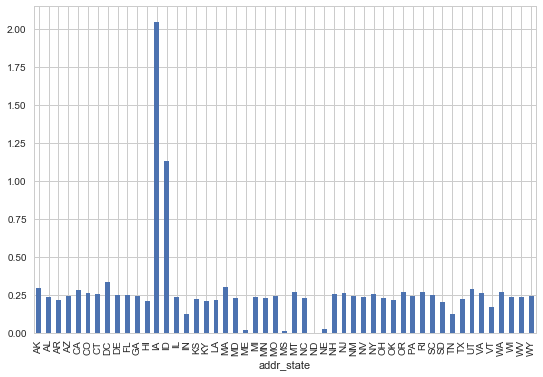

In [81]:
loans_all['cpos'].groupby(loans_all['addr_state']).mean().plot(kind='bar')

<h4>Description Analysis by Loan Status</h4>

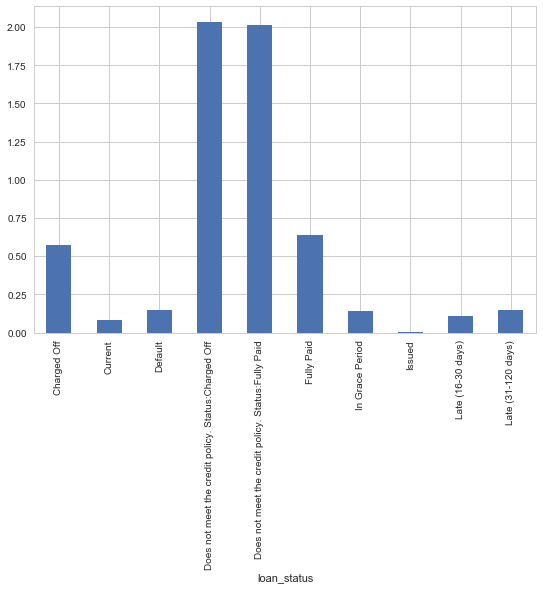

In [57]:
loans_all['cpos'].groupby(loans_all['loan_status']).mean().plot(kind='bar')

<h4>Description Analysis by Grade</h4>

This is easy to understand: people with high grades are confident, while people with low grades have intention to speak highly of themselves.

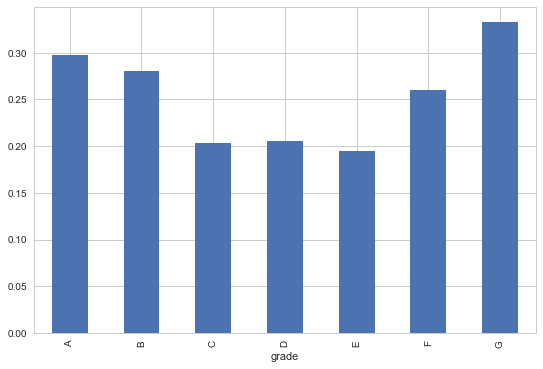

In [58]:
loans_all['cpos'].groupby(loans_all['grade']).mean().plot(kind='bar')

<h3>Correlation Matrix</h3>

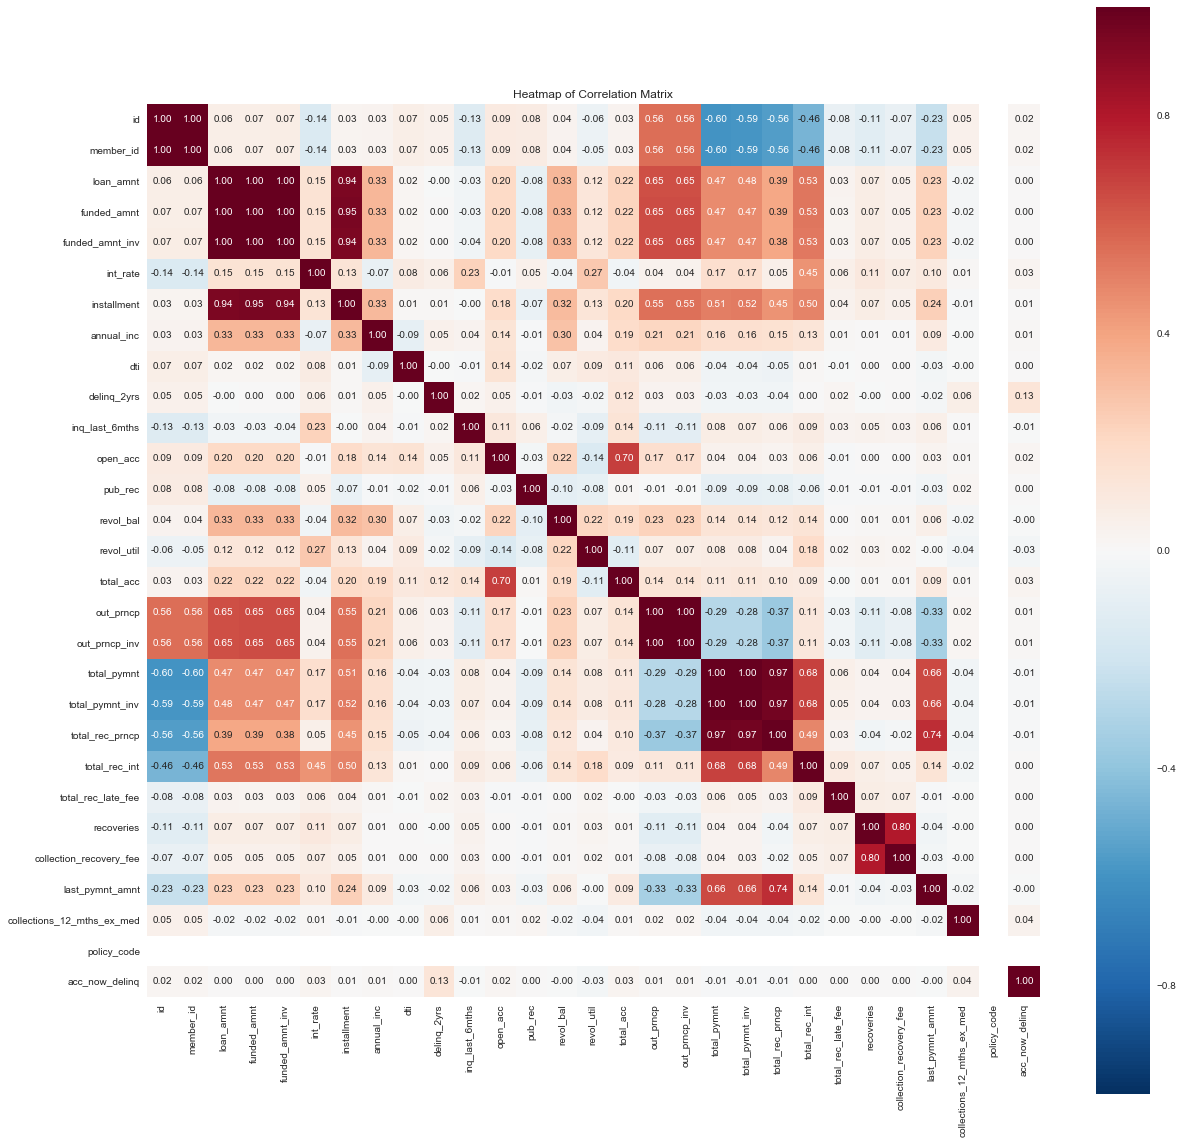

In [40]:
df2 = df.drop(['dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il','all_util',
               'max_bal_bc','open_rv_24m','open_rv_12m','total_cu_tl','total_bal_il','open_il_24m','open_il_12m',
               'open_il_6m','open_acc_6m','inq_fi','inq_last_12m','desc','mths_since_last_record','mths_since_last_major_derog',
               'mths_since_last_delinq','next_pymnt_d'],axis=1)
df2 = df2.drop(['emp_title','total_rev_hi_lim','tot_coll_amt','tot_cur_bal'],axis=1)

plt.rcParams['figure.figsize'] = (20,20)
corr=df2.corr()
corr = (corr)
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10}, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

<h3>Data Cleaning</h3>

In [45]:
df = pd.read_csv("loan.csv")

df=df.drop(['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','int_rate','emp_title','issue_d','zip_code',
            'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','desc','url','title',
            'initial_list_status','pymnt_plan','policy_code','application_type','earliest_cr_line','last_credit_pull_d',
            'next_pymnt_d','addr_state'],axis=1)

df=df.dropna(thresh=len(df)/2,axis=1)
df=df.dropna()

def status_binary(text):
    if text=='Fully Paid':
        return 0
    elif text=='Current' or text=='Issued':
        return -1
    else:
        return 1
df['loan_status']=df['loan_status'].apply(status_binary)
df=df[df['loan_status']!=-1]

def purpose_class(text):
    if text=='debt_consolidation' or text=='credit_card':
        return 'refinance'
    elif text=='house' or text=='home_improvement' or text=='renewable_energy' or text=='moving':
        return 'home'
    elif text=='car' or text=='major_purchase':
        return 'major_purchase'
    else:
        return 'other'
df['purpose']=df['purpose'].apply(purpose_class)

dummy_df=pd.get_dummies(df[['home_ownership','verification_status','purpose','term']])
df=df.drop(['home_ownership','verification_status','purpose','term'],axis=1)
df=pd.concat([df,dummy_df],axis=1)

mapping_dict={
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'n/a':0
    },
    'grade':{
        'A':1,
        'B':2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7,
    }
}
df=df.replace(mapping_dict)

cols = list(df)
cols.insert(0, cols.pop(cols.index('loan_status')))
df = df.ix[:, cols]
df.head()

C:\Users\wangj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



,loan_status,loan_amnt,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_home,purpose_major_purchase,purpose_other,purpose_refinance,term_ 36 months,term_ 60 months
42538,0,12000.0,407.40,2,10,40000.0,16.94,0.0,0.0,7.0,2.0,5572.0,68.8,32.0,0.0,0.0,15386.0,13605.0,8100.0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
42544,0,3000.0,100.87,2,10,25000.0,24.68,0.0,0.0,5.0,2.0,2875.0,54.2,26.0,0.0,0.0,154.0,19530.0,5300.0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
42546,0,28000.0,872.52,1,5,325000.0,18.55,0.0,1.0,15.0,0.0,29581.0,54.6,31.0,0.0,0.0,0.0,799592.0,54200.0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
42549,0,24000.0,814.80,2,10,100000.0,22.18,0.0,0.0,14.0,0.0,21617.0,76.7,39.0,0.0,0.0,539.0,199834.0,28200.0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
42550,1,8000.0,261.88,2,2,33000.0,15.75,0.0,1.0,9.0,1.0,7203.0,34.6,16.0,0.0,0.0,0.0,15949.0,20800.0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


<h3>Machine Learning</h3>

In [69]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,1:34]
y_train = train[['loan_status']]
x_test = test.iloc[0:,1:34]
y_test = test[['loan_status']]

In [70]:
false_paid=pd.DataFrame([[0,0,0],[0,0,0]],columns=['Decision Tree','Random Forests','Logistic Regression'],index=['train','test'])
default_identified=pd.DataFrame([[0,0,0],[0,0,0]],columns=['Decision Tree','Random Forests','Logistic Regression'],index=['train','test'])

<h3>Decision Tree</h3>

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy',class_weight={0: 0.15, 1: 0.85})
model.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
import numpy as np
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
false_paid.loc['train','Decision Tree']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['train','Decision Tree']=100*default[1]/(default[1]+fully_paid[1])

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
false_paid.loc['test','Decision Tree']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['test','Decision Tree']=100*default[1]/(default[1]+fully_paid[1])

<h3>Random Forests</h3>

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0: 0.15, 1: 0.85})
model.fit(x_train,np.ravel(y_train))

from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
false_paid.loc['train','Random Forests']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['train','Random Forests']=100*default[1]/(default[1]+fully_paid[1])

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
false_paid.loc['test','Random Forests']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['test','Random Forests']=100*default[1]/(default[1]+fully_paid[1])

<h3>Logistic Regression</h3>

In [73]:
from sklearn.linear_model import LogisticRegression
import numpy as np
model = LogisticRegression(class_weight={0: 0.15, 1: 0.85})
model.fit(x_train, np.ravel(y_train))

from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
false_paid.loc['train','Logistic Regression']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['train','Logistic Regression']=100*default[1]/(default[1]+fully_paid[1])

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
false_paid.loc['test','Logistic Regression']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['test','Logistic Regression']=100*default[1]/(default[1]+fully_paid[1])

<h3>Comparison</h3>

In [76]:
print('The portion of predicted fully paid loans that will default(%)')
print(false_paid)
print('\n')
print('The portion of default loans that are correctly identified(%)')
print(default_identified)

The portion of predicted fully paid loans that will default(%)
       Decision Tree  Random Forests  Logistic Regression
train      12.258895        3.162112            11.091992
test       12.263572       25.391935            11.066211


The portion of default loans that are correctly identified(%)
       Decision Tree  Random Forests  Logistic Regression
train      88.154186       91.061679            95.744141
test       88.252941       12.729412            95.811765


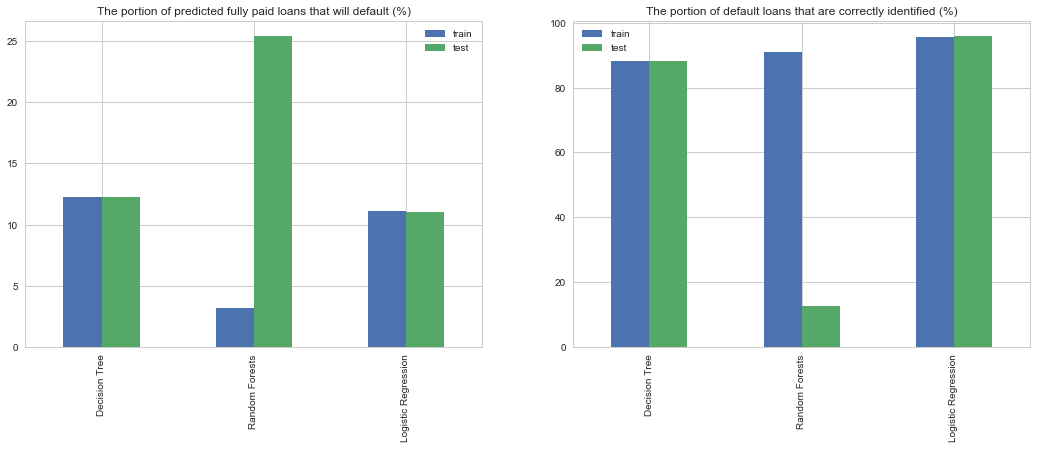

In [81]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
false_paid.T.plot(kind='bar',ax=axs[0])
axs[0].set_title('The portion of predicted fully paid loans that will default (%)')
default_identified.T.plot(kind='bar',ax=axs[1])
axs[1].set_title('The portion of default loans that are correctly identified (%)')
plt.show()